<a href="https://colab.research.google.com/github/HarshalRathore/MachineLearning_Data_Repositories/blob/main/my_housing_pricing_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files


In [76]:
pd.set_option("display.max_rows", 999)
pd.set_option("display.max_columns", 999)

housedf = pd.read_csv('https://raw.githubusercontent.com/HarshalRathore/MachineLearning_Data_Repositories/main/house-prices-advanced-regression-techniques/train.csv')

In [77]:
housedf.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,1452,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,1460,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,864,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,NaN

In [78]:
#@title All the Features who have `NaN` value count more than 1.
#@markdown But actually in some features this `NaN` is used to indicate that those property don't haave that particular feature(i.e like a property does not have basement so `NaN` is used here) rather than to indicate that that is an Missing data point.   
# null_colls = [col for col in housedf.columns if housedf[col].isnull().sum() > 0]
# null_colls_values = [housedf[col].isnull().sum() for col in housedf.columns if housedf[col].isnull().sum() > 0]
null_colls = list(filter(lambda col: housedf[col].isna().sum() > 0, housedf.columns))
null_colls_values = list(map(lambda col: housedf[col].isna().sum(), filter(lambda col: housedf[col].isna().sum() > 0, housedf.columns)))
d = {"Columns": null_colls, "NaN_Count": null_colls_values}
d = pd.DataFrame(d)
d


,Columns,NaN_Count
0,LotFrontage,259
1,Alley,1369
2,MasVnrType,8
3,MasVnrArea,8
4,BsmtQual,37
5,BsmtCond,37
6,BsmtExposure,38
7,BsmtFinType1,37
8,BsmtFinType2,38
9,Electrical,1


In [79]:
housedf.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


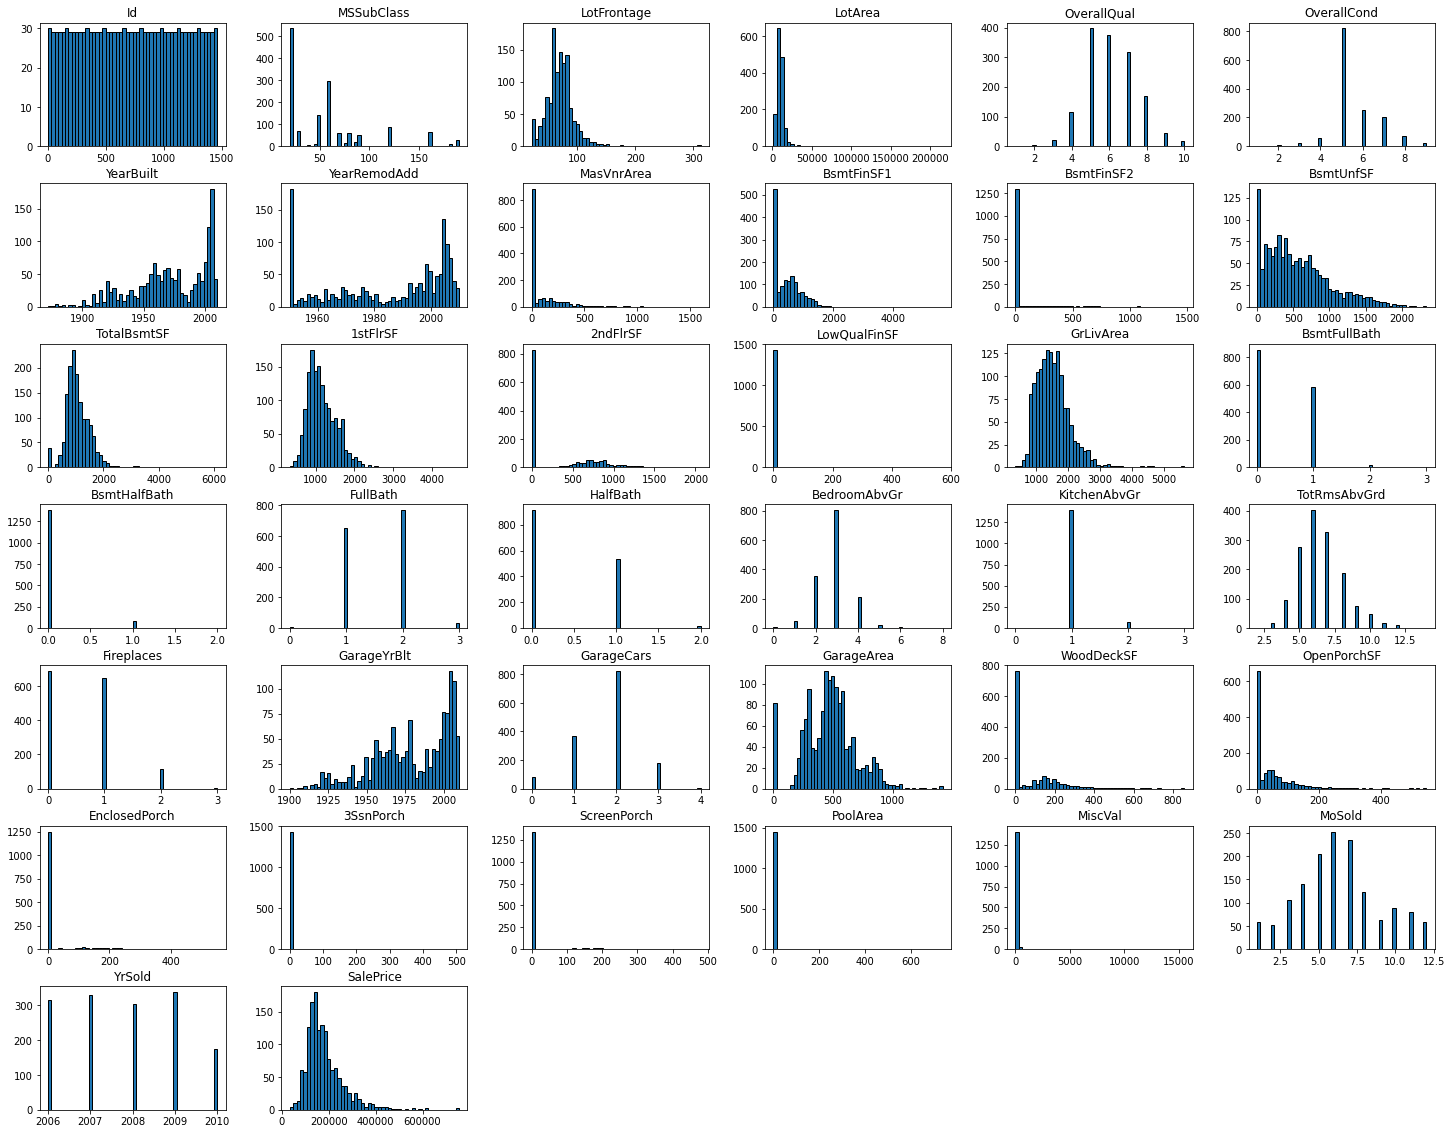

In [80]:
housedf.hist(bins=50, figsize=(25, 20), edgecolor='black', grid=False)
plt.show()

In [81]:
#@title Checking Correlationship with "SalePrice"
corr_matrix = housedf.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [82]:
#@title Creating Test set using Stratified Sampling with `OverallQual` as base variable as it has the most strong correlationship with the target variable. 
# from sklearn.model_selection import StratifiedShuffleSplit

# splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=42)

# columns = ["OverallQual", "GrLivArea"]
# strat_splits = list()
# for train_index, test_index in splitter.split(housedf, housedf['OverallQual']):
#     strat_train_set_n = housedf.iloc[train_index]
#     strat_test_set_n = housedf.iloc[test_index]
#     strat_splits.append([strat_train_set_n, strat_test_set_n])

# strat_train_set, strat_test_set = strat_splits[0]

In [83]:
# display(strat_train_set.shape, strat_test_set.shape)

In [84]:
#@title Creating a copy for Data exploration & Visualization.
# housing = strat_train_set.copy()
housing=housedf.copy()

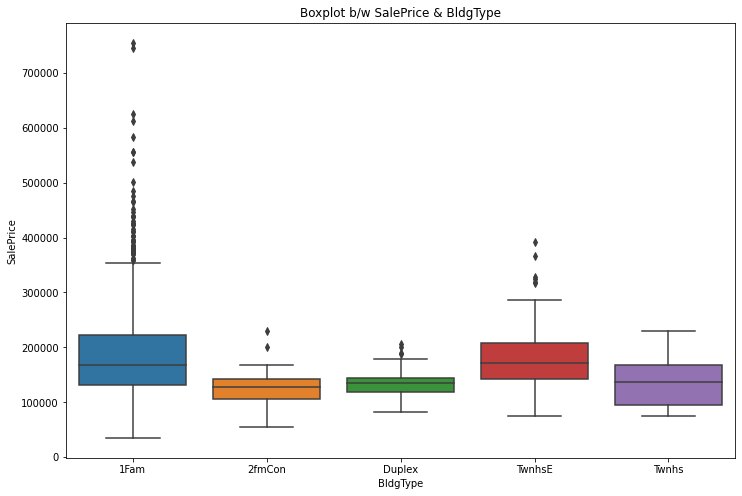

In [85]:
plt.figure(figsize=(12, 8))
sns.boxplot(x=housing.BldgType, y=housing.SalePrice)
plt.title('Boxplot b/w SalePrice & BldgType')
plt.show()

<AxesSubplot:title={'center':'BoxPlot of SalePrice and OverallQual'}, xlabel='OverallQual', ylabel='SalePrice'>

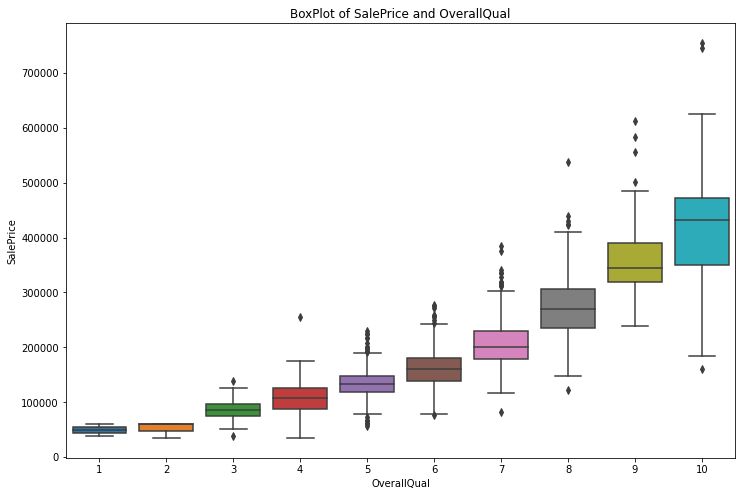

In [86]:
plt.figure(figsize=(12, 8))
plt.title('BoxPlot of SalePrice and OverallQual')
sns.boxplot(x=housing.OverallQual, y=housing.SalePrice)

Text(0.5, 1.0, 'BoxPlot of MSZoning & SalePrice')

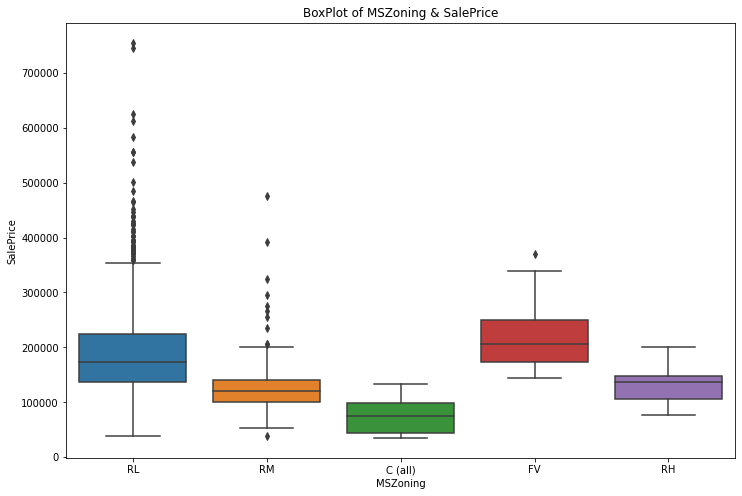

In [87]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=housing, x='MSZoning', y='SalePrice')
plt.title('BoxPlot of MSZoning & SalePrice')

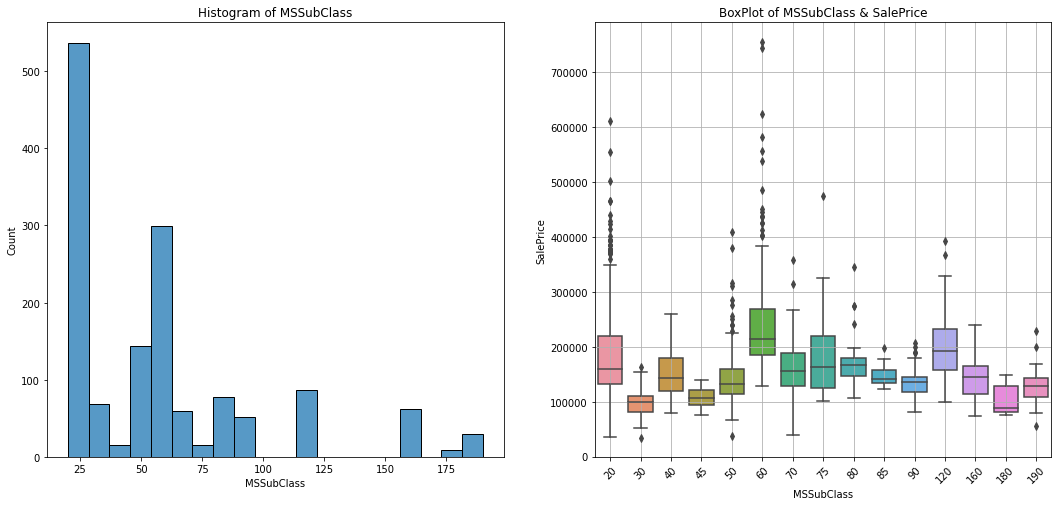

In [88]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))
ax = ax.flatten()

sns.histplot(data=housedf, x='MSSubClass', ax=ax[0])
sns.boxplot(data=housedf, x='MSSubClass', y='SalePrice', ax=ax[1])

ax[0].set_title('Histogram of MSSubClass')
ax[1].set_title('BoxPlot of MSSubClass & SalePrice')

plt.grid(True)
plt.xticks(rotation=45)
plt.show()

<AxesSubplot:>

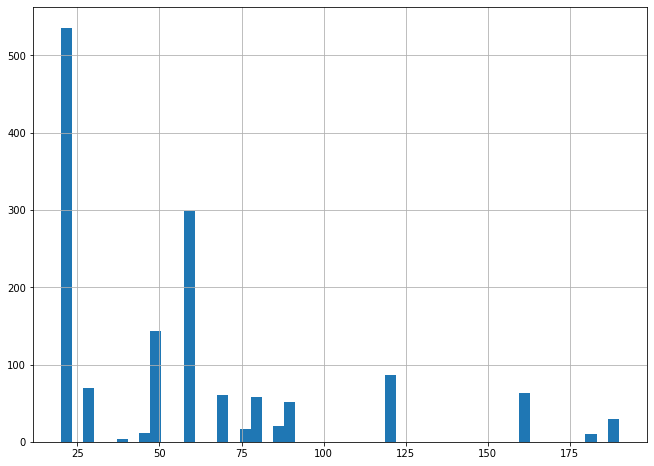

In [89]:
plt.figure(figsize=(11, 8))
display(housedf.MSSubClass.hist(bins=50))

In [90]:
#@title All the rows of the Integer Type columns who have `NaN` value
housing[housing.select_dtypes(include=[np.number]).isnull().any(axis=1)].select_dtypes(include=[np.number])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
7,8,60,NaN,10382,7,6,1973,1973,240.0,859,32,216,1107,1107,983,0,2090,1,0,2,1,3,1,7,2,1973.0,2,484,235,204,228,0,0,0,350,11,2009,200000
12,13,20,NaN,12968,5,6,1962,1962,0.0,737,0,175,912,912,0,0,912,1,0,1,0,2,1,4,0,1962.0,1,352,140,0,0,0,176,0,0,9,2008,144000
14,15,20,NaN,10920,6,5,1960,1960,212.0,733,0,520,1253,1253,0,0,1253,1,0,1,1,2,1,5,1,1960.0,1,352,0,213,176,0,0,0,0,5,2008,157000
16,17,20,NaN,11241,6,7,1970,1970,180.0,578,0,426,1004,1004,0,0,1004,1,0,1,0,2,1,5,1,1970.0,2,480,0,0,0,0,0,0,700,3,2010,149000
24,25,20,NaN,8246,5,8,1968,2001,0.0,188,668,204,1060,1060,0,0,1060,1,0,1,0,3,1,6,1,1968.0,1,270,406,90,0,0,0,0,0,5,2010,154000
31,32,20,NaN,8544,5,6,1966,2006,0.0,0,0,1228,1228,1228,0,0,1228,0,0,1,1,3,1,6,0,1966.0,1,271,0,65,0,0,0,0,0,6,2008,149350
39,40,90,65.0,6040,4,5,1955,1955,0.0,0,0,0,0,1152,0,0,1152,0,0,2,0,2,2,6,0,NaN,0,0,0,0,0,0,0,0,0,6,2008,82000
42,43,85,NaN,9180,5,7,1983,1983,0.0,747,93,0,840,884,0,0,884,1,0,1,0,2,1,5,0,1983.0,2,504,240,0,0,0,0,0,0,12,2007,144000
43,44,20,NaN,9200,5,6,1975,1980,0.0,280,491,167,938,938,0,0,938,1,0,1,0,3,1,5,0,1977.0,1,308,145,0,0,0,0,0,0,7,2008,130250
48,49,190,33.0,4456,4,5,1920,2008,0.0,0,0,736,736,736,716,0,1452,0,0,2,0,2,3,8,0,NaN,0,0,0,0,102,0,0,0,0,6,2009,113000


In [91]:
#@title Creating a fresh copy of training dataset without our target variable `SalePrice` because we don't want to apply transformation on the target variable by mistake.
# housing = strat_train_set.drop("SalePrice", axis=1)
# housing_labels = strat_train_set["SalePrice"].copy()
housing = housedf.drop("SalePrice", axis=1)
housing_labels = housedf["SalePrice"].copy()

In [92]:
#@title Training an `SimpleImputer` for filling in missing data points in integer type features.
# Filling missing values in LotFrontage MasVnrArea with strategy=median
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
housing_num = housing.select_dtypes(include=[np.number])
actual_nan_labels = ['LotFrontage', 'MasVnrArea']
actual_nan_colls = housing_num[actual_nan_labels]
imputer.fit(actual_nan_colls)
imputer.statistics_

array([69.,  0.])

In [93]:
#@title Transforming the housing dataframe with trained simpleimputer
X = imputer.transform(actual_nan_colls)
# converting sparse matrix to dataframe
actual_nan_colls_tr = pd.DataFrame(X, columns=actual_nan_colls.columns, index=actual_nan_colls.index)
housing_tr = housing_num.copy()
housing_tr[actual_nan_labels] = actual_nan_colls_tr.copy()
housing_tr.fillna(0, inplace=True)


In [94]:
#@title All the `object` type features 
def all_object_feature(all_obj):
    """Prints all the Object type labels with NaN value count more than 0 with their respective counts"""
    null_colls = list(filter(lambda col: all_obj[col].isna().sum() > 0, all_obj.columns))
    null_colls_values = list(map(lambda col: all_obj[col].isna().sum(), filter(lambda col: all_obj[col].isna().sum() > 0, all_obj.columns)))
    d = {"Columns": null_colls, "NaN_Count": null_colls_values}
    return pd.DataFrame(d)
    
d = all_object_feature(housing.select_dtypes(include='object'))

Replace all the NaN values with `No` in all the object type features above excluding `['MasVnrType', 'Electrical']` 

In [95]:
def rep_nan_with_no(housing_cat, false_nan_colls):
    false_nan_colls = [coll for coll in false_nan_colls if coll not in ['MasVnrType', 'Electrical']]
    copy = housing_cat[false_nan_colls].copy()
    copy.fillna('No', inplace=True)
    housing_cat[false_nan_colls] = copy.copy()
    return housing_cat

housing_cat = rep_nan_with_no(housing.select_dtypes(include='object'), list(d.Columns))


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


Replacing missing values in `['MasVnrType', 'Electrical']` with simpleImputer `most_frequent` strategy.

In [96]:
imputy = SimpleImputer(strategy='most_frequent')

arr = housing_cat[['MasVnrType', 'Electrical']].copy()

T = imputy.fit_transform(arr)

housing_cat[list(arr.columns)] = pd.DataFrame(T, columns=arr.columns, index=arr.index)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [97]:
#@title Oridinally Encodeing selective Categorical Features
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

labels4_OrEnc = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'SaleType', 'SaleCondition',]

housing_cat[labels4_OrEnc] = pd.DataFrame(ordinal_encoder.fit_transform(housing_cat[labels4_OrEnc]), 
                                          columns=ordinal_encoder.feature_names_in_, 
                                          index=housing_cat[labels4_OrEnc].index)


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [98]:
#@title One-Hot Encoded selective Categorical Features
from sklearn.preprocessing import OneHotEncoder

labels4_1hot = ['Neighborhood','Exterior1st','RoofMatl','RoofStyle','Exterior2nd','MasVnrType','Foundation','Heating','CentralAir','Electrical','MiscFeature']
# labels4_1hot = ['Exterior1st','RoofMatl','RoofStyle','Exterior2nd','MasVnrType','Foundation','Heating','CentralAir','Electrical','MiscFeature']

housing_onehotEncoded = pd.get_dummies(housing_cat[labels4_1hot])

housing_cat.drop(labels=labels4_1hot, axis=1, inplace=True)

# Concatinating Ordinally Encoded and One-Hot encoded features
housing_cat = pd.concat([housing_cat, housing_onehotEncoded], axis=1)
housing_cat.head(5)


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,BldgType,HouseStyle,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,SaleType,SaleCondition,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,MiscFeature_Gar2,MiscFeature_No,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC
0,3.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,2.0,2.0,0.0,5.0,2.0,4.0,2.0,4.0,3.0,2.0,6.0,0.0,2.0,6.0,3.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0,8.0,4.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
1,3.0,1.0,1.0,3.0,3.0,0.0,2.0,0.0,1.0,2.0,0.0,2.0,3.0,4.0,2.0,4.0,1.0,0.0,6.0,0.0,3.0,6.0,5.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0,8.0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
2,3.0,1.0,1.0,0.0,3.0,0.0,4.0,0.0,2.0,2.0,0.0,5.0,2.0,4.0,2.0,4.0,2.0,2.0,6.0,0.0,2.0,6.0,5.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0,8.0,4.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
3,3.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,2.0,2.0,0.0,5.0,3.0,4.0,4.0,1.0,3.0,0.0,6.0,2.0,2.0,6.0,2.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,8.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
4,3.0,1.0,1.0,0.0,3.0,0.0,2.0,0.0,2.0,2.0,0.0,5.0,2.0,4.0,2.0,4.0,0.0,2.0,6.0,0.0,2.0,6.0,5.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0,8.0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0


<AxesSubplot:>

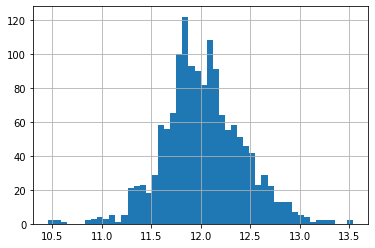

In [99]:
housing_labels.apply(np.log).hist(bins=50)

In [100]:
#@title Concatinating nummerical and categorical features
housing = pd.concat([housing_tr, housing_cat], axis=1)

In [101]:
housing.shape

(1460, 167)

In [102]:
#@title Training LinearRegression model on final processed housing(left feature scaling, uniform distribution transformation) dataset
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(housing, housing_labels)


LinearRegression()

In [103]:
#@title Comparing  trained LinearRegression model's prediction on housing dataset with housing_labels
housing_prediction = regressor.predict(housing)
display(housing_prediction[:5].round(-2))
display(housing_labels.iloc[:5].values)

array([214100., 212800., 207200., 164600., 307600.])

array([208500, 181500, 223500, 140000, 250000])

In [104]:
#@title Using RMSE for calculating average prediction error of trained LinearRegression model on housing dataset
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(housing_labels, housing_prediction, squared=False)
rmse

24608.278520826545

In [105]:
#@title Training DecisionTreeRegressor 
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing, housing_labels)

DecisionTreeRegressor(random_state=42)

In [106]:
#@title Comparing Trained DecisionTreeRegressor model on housing dataset
prediction_decisiontree = tree_reg.predict(housing)

display(prediction_decisiontree[:5])
display(housing_labels.iloc[:5].values)

array([208500., 181500., 223500., 140000., 250000.])

array([208500, 181500, 223500, 140000, 250000])

In [107]:
#@title RMSE on Decision Tree
tree_rmse = mean_squared_error(housing_labels, prediction_decisiontree, squared=False)
tree_rmse

0.0

In [108]:
#@title Prediction Error measuring with Cross-Validation technique on DecisionTreeRegressor
# As you can see that although RMSE score on training data itself was zero but with cross validation it comes out to be 40057 which proves
# our assumption that Decision Tree strongly Overfitted the training data.

from sklearn.model_selection import cross_val_score
tree_rmses = -cross_val_score(tree_reg, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=10)
pd.Series(tree_rmses).describe()

count       10.000000
mean     38865.449542
std       8751.810000
min      30405.161403
25%      34729.417676
50%      37552.554585
75%      38894.555057
max      61493.065084
dtype: float64

In [109]:
#@title Applying 10-fold-Cross-Validation on LinearRegression model
# The results show us that this model is also strongly overfitting the training data reason being that mean from cross-validation
# is large compared to the RMSE score above(it was 21000 approx) & standard deviation score is also large compared to mean score,
# indicating a relatively high variability in the scores. which shows that the RMSE scores across 10-folds of dataset is not consistent
# meaning that the model is not generalising well across different sets of unseen data. Although the Variance score(standard deviation)
# of DecisionTree above is very less compared to the mean score which says that RMSE score across different sets of unseen data does not vary
# too much it only varies by 7344(which is still a lot but compared to our regression model it is less).

regressor_rmses = -cross_val_score(regressor, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=10)
pd.Series(regressor_rmses).describe()

count       10.000000
mean     32456.362362
std      12340.061369
min      22953.303443
25%      26166.818656
50%      27035.088068
75%      32279.328308
max      63345.680824
dtype: float64

In [110]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(housing, housing_labels)
predictions = forest.predict(housing)

In [111]:
rmse = mean_squared_error(housing_labels, predictions, squared=False)
rmse

11319.249835031356

In [112]:
forest_cross_validation = -cross_val_score(forest, housing, housing_labels, scoring='neg_root_mean_squared_error', cv=10)
pd.Series(forest_cross_validation).describe()

count       10.000000
mean     28778.504770
std       6692.245350
min      21543.585459
25%      24553.895977
50%      25883.777753
75%      31892.729309
max      41511.528276
dtype: float64

In [113]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(housing, housing_labels)
svr_predictions = svr.predict(housing)

In [114]:
rmse = mean_squared_error(housing_labels, svr_predictions, squared=False)
rmse

81395.38929582774

In [115]:
svr_cross_validation = -cross_val_score(svr, housing, housing_labels, scoring='neg_root_mean_squared_error', cv=3)
pd.Series(svr_cross_validation).describe()

count        3.000000
mean     81503.125873
std       2320.298025
min      79217.276083
25%      80326.487629
50%      81435.699176
75%      82646.050768
max      83856.402360
dtype: float64

In [116]:
housing.shape

(1460, 167)

In [139]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.pipeline import make_pipeline

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
model = TransformedTargetRegressor(RandomForestRegressor(), transformer=log_transformer)
X = make_pipeline(StandardScaler(), model)
X.fit(housing, housing_labels)
predictions = X.predict(housing)

In [118]:
kfold_crossVal_score = -cross_val_score(X, housing, housing_labels, scoring='neg_root_mean_squared_error', cv=10)
pd.Series(kfold_crossVal_score).describe() 

count       10.000000
mean     29217.568228
std       7567.275219
min      22046.946813
25%      23589.035113
50%      26676.598623
75%      33933.622684
max      41461.469234
dtype: float64

In [119]:
from sklearn.metrics import mean_squared_error

predicted_sales_log = np.log(predictions.round(2))
observed_sales_log = np.log(list(housing_labels))

rmse = np.sqrt(mean_squared_error(observed_sales_log, predicted_sales_log))

print("RMSE: ", rmse)

RMSE:  0.052534987283690965


In [120]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.pipeline import Pipeline

param_distribs = {
    'n_estimators': randint(low=50, high=200),
    'max_features': randint(low=10, high=50),
    'max_depth': randint(low=5, high=20),
    'min_samples_split': randint(low=5, high=20),
    'min_samples_leaf': randint(low=2, high=10)
}
rnd_search = RandomizedSearchCV(forest, param_distributions=param_distribs, n_iter=10, cv=3, scoring='neg_root_mean_squared_error', random_state=42)
rnd_search.fit(housing, housing_labels)
rnd_search.best_params_

{'max_depth': 15,
 'max_features': 33,
 'min_samples_leaf': 6,
 'min_samples_split': 8,
 'n_estimators': 153}

In [121]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
best_forest = RandomForestRegressor(**rnd_search.best_params_)
bestest_forest = TransformedTargetRegressor(RandomForestRegressor(**rnd_search.best_params_), transformer=log_transformer)
pops = make_pipeline(StandardScaler(), bestest_forest)
score = -cross_val_score(pops, housing, housing_labels, scoring='neg_root_mean_squared_error', cv=10)
pd.Series(score).describe() 

count       10.000000
mean     31100.160339
std       7813.064227
min      23254.222288
25%      25332.591578
50%      28309.995724
75%      35511.612746
max      45336.528938
dtype: float64

In [122]:
# from sklearn import set_config
# set_config(display="diagram")
# housing = strat_train_set.drop("SalePrice", axis=1)

In [123]:
#@title Data Transformation pipeline
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import FunctionTransformer
# from sklearn.compose import make_column_transformer
# from sklearn.compose import TransformedTargetRegressor
# ordinal_encoder = OrdinalEncoder()

# # Selective Attributes
# actual_nan_labels = ['LotFrontage', 'MasVnrArea']
# housing_cat = housing.select_dtypes(include='object').copy()
# false_nan_colls = list(d.Columns)
# false_nan_colls = [coll for coll in false_nan_colls if coll not in ['MasVnrType', 'Electrical']]
# false_nan_colls.remove('MiscFeature')
# ordinal_labels = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'SaleType', 'SaleCondition',]
# onehot_labels = ['Neighborhood','Exterior1st','RoofMatl','RoofStyle','Exterior2nd','MasVnrType','Foundation','Heating','CentralAir','Electrical','MiscFeature']
# variable = [i for i in housing_tr.columns if i not in ['LotFrontage', 'MasVnrArea']]


# # Functions for custom Transformers
# def replace_nan_with_no(data):
#     data = data.fillna('No')
#     return data

# def onehotencode_func(data):
#     X = pd.get_dummies(data[onehot_labels])
#     data = pd.concat([data, X], axis=1)
#     data.drop(onehot_labels, axis=1, inplace=True)
#     return data

# def fill(data):
#     data.fillna(0, inplace=True)
#     return data

# # Normal Functions
# def convert2df(data, postprocesseddata, pipeline):
#     """Converts to df"""
#     X = pd.DataFrame(data, columns=pipeline.get_feature_names_out(), index=postprocesseddata.index)
#     return X.drop(['SalePrice'], axis=1)

# # Transformers
# log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
# replace_nan_with_no_transformer = FunctionTransformer(replace_nan_with_no)
# simpleimputer_median_transformer = SimpleImputer(strategy='median')
# most_freq_transformer = SimpleImputer(strategy='most_frequent')
# getdummies_transformer = FunctionTransformer(onehotencode_func)
# fillna0 = FunctionTransformer(fill)

# columnTransformer = make_column_transformer((replace_nan_with_no_transformer, false_nan_colls), remainder='passthrough')

# lol = make_pipeline(columnTransformer, ordinal_encoder)

# CTransformer2 = make_column_transformer((most_freq_transformer, ['MasVnrType', 'Electrical']), remainder='passthrough')

# RTransformer = make_column_transformer((replace_nan_with_no_transformer, ['MiscFeature']), remainder='passthrough')

# lol2 = make_pipeline(RTransformer, CTransformer2, getdummies_transformer)

# # used for transforming selective features, can take transformer or pipeline as input
# preprocessing = make_column_transformer((simpleimputer_median_transformer, actual_nan_labels),
#                                         (fillna0, variable),
#                                         (lol, ordinal_labels),
#                                         # (most_freq_transformer, ['MasVnrType', 'Electrical']),
#                                         # (ordinal_encoder, ordinal_labels),
#                                         (lol2, onehot_labels))

# saleprice_preprocessing = make_column_transformer((log_transformer, ['SalePrice']), remainder='passthrough')

# # PipeLines
# data = preprocessing.fit_transform(housing)
# processed_data = pipeline.fit_transform(strat_train_set)      

# df_housing_processed = convert2df(processed_data, strat_train_set, preprocessing)

In [124]:
test_housing = pd.read_csv('https://raw.githubusercontent.com/HarshalRathore/MachineLearning_Data_Repositories/main/house-prices-advanced-regression-techniques/test.csv')

In [125]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
test_housing_num = test_housing.select_dtypes(include=[np.number])
actual_nan_labels = ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageArea']
actual_nan_colls = test_housing_num[actual_nan_labels]
imputer.fit(actual_nan_colls)
imputer.statistics_

array([ 67. ,   0. , 350.5,   0. , 460. , 988. ,   0. ,   0. ,   2. ,
       480. ])

In [140]:
#@title Transforming the test_housing dataframe with trained simpleimputer
A = imputer.transform(actual_nan_colls)
# converting sparse matrix to dataframe
actual_nan_colls_tr = pd.DataFrame(A, columns=actual_nan_colls.columns, index=actual_nan_colls.index)
test_housing_tr = test_housing_num.copy()
test_housing_tr[actual_nan_labels] = actual_nan_colls_tr.copy()
test_housing_tr.fillna(0, inplace=True)


In [141]:
#@title All the `object` type features 
def all_object_feature(all_obj):
    """Prints all the Object type labels with NaN value count more than 0 with their respective counts"""
    null_colls = list(filter(lambda col: all_obj[col].isna().sum() > 0, all_obj.columns))
    null_colls_values = list(map(lambda col: all_obj[col].isna().sum(), filter(lambda col: all_obj[col].isna().sum() > 0, all_obj.columns)))
    d = {"Columns": null_colls, "NaN_Count": null_colls_values}
    return pd.DataFrame(d)
    
d = all_object_feature(test_housing.select_dtypes(include='object'))

In [142]:
def rep_nan_with_no(test_housing_cat, false_nan_colls):
    false_nan_colls = [coll for coll in false_nan_colls if coll not in ['MasVnrType', 'Electrical']]
    copy = test_housing_cat[false_nan_colls].copy()
    copy.fillna('No', inplace=True)
    test_housing_cat[false_nan_colls] = copy.copy()
    return test_housing_cat

test_housing_cat = rep_nan_with_no(test_housing.select_dtypes(include='object'), list(d.Columns))


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [143]:
def rep_nan_with_no(test_housing_cat, false_nan_colls):
    false_nan_colls = [coll for coll in false_nan_colls if coll not in ['MasVnrType', 'Electrical']]
    copy = test_housing_cat[false_nan_colls].copy()
    copy.fillna('No', inplace=True)
    test_housing_cat[false_nan_colls] = copy.copy()
    return test_housing_cat

test_housing_cat = rep_nan_with_no(test_housing.select_dtypes(include='object'), list(d.Columns))


In [144]:
imputy = SimpleImputer(strategy='most_frequent')

arr = test_housing_cat[['MasVnrType', 'Electrical']].copy()

T = imputy.fit_transform(arr)

test_housing_cat[list(arr.columns)] = pd.DataFrame(T, columns=arr.columns, index=arr.index)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [145]:
#@title Oridinally Encodeing selective Categorical Features
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

labels4_OrEnc = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'SaleType', 'SaleCondition',]

test_housing_cat[labels4_OrEnc] = pd.DataFrame(ordinal_encoder.fit_transform(test_housing_cat[labels4_OrEnc]), 
                                          columns=ordinal_encoder.feature_names_in_, 
                                          index=test_housing_cat[labels4_OrEnc].index)


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [146]:
#@title One-Hot Encoded selective Categorical Features
from sklearn.preprocessing import OneHotEncoder

labels4_1hot = ['Neighborhood','Exterior1st','RoofMatl','RoofStyle','Exterior2nd','MasVnrType','Foundation','Heating','CentralAir','Electrical','MiscFeature']
# labels4_1hot = ['Exterior1st','RoofMatl','RoofStyle','Exterior2nd','MasVnrType','Foundation','Heating','CentralAir','Electrical','MiscFeature']

test_housing_onehotEncoded = pd.get_dummies(test_housing_cat[labels4_1hot])

test_housing_cat.drop(labels=labels4_1hot, axis=1, inplace=True)

# Concatinating Ordinally Encoded and One-Hot encoded features
test_housing_cat = pd.concat([test_housing_cat, test_housing_onehotEncoded], axis=1)
test_housing_cat.head(5)


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,BldgType,HouseStyle,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,SaleType,SaleCondition,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_No,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,RoofMatl_CompShg,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_No,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,MiscFeature_Gar2,MiscFeature_No,MiscFeature_Othr,MiscFeature_Shed
0,3.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,1.0,2.0,0.0,2.0,3.0,4.0,4.0,4.0,3.0,5.0,3.0,4.0,4.0,7.0,3.0,1.0,3.0,4.0,5.0,2.0,2.0,2.0,9.0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0
1,4.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,2.0,2.0,0.0,2.0,3.0,4.0,4.0,4.0,3.0,0.0,6.0,4.0,2.0,7.0,3.0,1.0,3.0,4.0,5.0,2.0,2.0,4.0,9.0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0
2,4.0,1.0,1.0,0.0,3.0,0.0,4.0,0.0,2.0,2.0,0.0,4.0,3.0,4.0,2.0,4.0,3.0,2.0,6.0,2.0,4.0,7.0,5.0,1.0,0.0,4.0,5.0,2.0,2.0,2.0,9.0,4.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0
3,4.0,1.0,1.0,0.0,3.0,0.0,4.0,0.0,2.0,2.0,0.0,4.0,3.0,4.0,4.0,4.0,3.0,2.0,6.0,0.0,2.0,7.0,2.0,1.0,0.0,4.0,5.0,2.0,2.0,4.0,9.0,4.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0
4,4.0,1.0,1.0,0.0,1.0,0.0,4.0,0.0,2.0,2.0,4.0,2.0,2.0,4.0,2.0,4.0,3.0,0.0,6.0,0.0,2.0,7.0,3.0,1.0,2.0,4.0,5.0,2.0,2.0,4.0,9.0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0


In [147]:
#@title Concatinating nummerical and categorical features
test_set = pd.concat([test_housing_tr, test_housing_cat], axis=1)

In [148]:
print(housing.shape)
print(test_set.shape)

(1460, 167)
(1459, 158)


In [149]:
lust = [i for i in housing.columns if i not in test_set.columns]
last = [i for i in test_set.columns if i not in housing.columns]
print(lust, '\n\n\n', last)

['Exterior1st_ImStucc', 'Exterior1st_Stone', 'RoofMatl_ClyTile', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'Exterior2nd_Other', 'Heating_Floor', 'Heating_OthW', 'Electrical_Mix', 'MiscFeature_TenC'] 


 ['Exterior1st_No', 'Exterior2nd_No']


In [150]:
new_housing = housing.drop(lust, axis=1)
new_test_set = test_set.drop(last, axis=1)

In [151]:
print(new_housing.shape, new_test_set.shape)

(1460, 156) (1459, 156)


In [152]:
X.fit(new_housing, housing_labels)
new_test_set_predictions = X.predict(new_test_set)

In [153]:
submission = pd.concat([new_test_set['Id'], pd.Series(new_test_set_predictions, name='SalePrice')], axis=1)
submission

,Id,SalePrice
0,1461,123772.463839
1,1462,151457.364996
2,1463,171505.188529
3,1464,170955.669487
4,1465,189430.922690
...,...,...
1454,2915,80557.803769
1455,2916,81285.130890
1456,2917,154178.484824
1457,2918,112379.277509


In [154]:
submission.to_csv('Submission.csv', index=False)